In [81]:
#1: Define the raw Google Matrix, G

import numpy as np

G = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])

In [82]:
#2: Fix dangling nodes (rows with all zeros), and normalize
n = G.shape[0]
for i in range(n):
    if np.sum(G[i, :]) == 0:
        G[i, :] = 1 / n  # Distribute to all nodes

# Normalize G to ensure all rows sum to 1
G = G / G.sum(axis=1, keepdims=True)

print("Google Matrix (G):")
print(G)

Google Matrix (G):
[[0.         0.5        0.         0.         0.5        0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.33333333
  0.         0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.         0.         0.5        0.         0.         0.        ]
 [0.         0.         0.25       0.25       0.         0.
  0.         0.         0.25       0.         0.         0.25      ]
 [0.         0.         0.         0.         0.2        0.2
  0.     

In [83]:
#3: Power method to find the principal eigenvector (PageRank vector)
def power_method(G, eps=1e-6, max_iter=100):
    n = G.shape[0]
    pi = np.ones(n) / n
    for i in range(max_iter):
        pi_new = G.T @ pi
        if np.linalg.norm(pi_new - pi, 1) < eps:
            break
        pi = pi_new
    return pi / np.sum(pi)

pi = power_method(G)

print("\nPageRank Vector (pi):")
print(pi)


PageRank Vector (pi):
[0.06982991 0.06982992 0.06803934 0.13697408 0.06982984 0.0537153
 0.17547003 0.03581026 0.12712615 0.01074305 0.00805729 0.17457483]


In [84]:
#4: Construct the modified Google matrix with teleportation
alpha = 0.85
E = np.ones((n, n)) / n
G_tilde = alpha * G + (1 - alpha) * E

print("\nModified Google Matrix (G_tilde):")
print(G_tilde)


Modified Google Matrix (G_tilde):
[[0.0125     0.4375     0.0125     0.0125     0.4375     0.0125
  0.0125     0.0125     0.0125     0.0125     0.0125     0.0125    ]
 [0.29583333 0.0125     0.29583333 0.29583333 0.0125     0.0125
  0.0125     0.0125     0.0125     0.0125     0.0125     0.0125    ]
 [0.0125     0.4375     0.0125     0.4375     0.0125     0.0125
  0.0125     0.0125     0.0125     0.0125     0.0125     0.0125    ]
 [0.29583333 0.0125     0.0125     0.0125     0.0125     0.29583333
  0.0125     0.0125     0.29583333 0.0125     0.0125     0.0125    ]
 [0.0125     0.0125     0.0125     0.4375     0.0125     0.0125
  0.0125     0.4375     0.0125     0.0125     0.0125     0.0125    ]
 [0.0125     0.0125     0.0125     0.0125     0.4375     0.0125
  0.0125     0.0125     0.4375     0.0125     0.0125     0.0125    ]
 [0.0125     0.0125     0.225      0.225      0.0125     0.0125
  0.0125     0.0125     0.225      0.0125     0.0125     0.225     ]
 [0.0125     0.0125     0.0125

In [85]:
#5: Power method on G_tilde
pi_tilde = power_method(G_tilde)
pi_tilde

array([0.07158147, 0.07325076, 0.06650948, 0.12799415, 0.07816064,
       0.05894977, 0.14679015, 0.04778031, 0.12162382, 0.02911213,
       0.02268477, 0.15556255])

In [86]:
#6: Normalization
pi = pi / np.sum(pi)
pi_tilde = pi_tilde / np.sum(pi_tilde)
pi_tilde

print("\nModified PageRank Vector (pi_tilde):")
print(pi_tilde)


Modified PageRank Vector (pi_tilde):
[0.07158147 0.07325076 0.06650948 0.12799415 0.07816064 0.05894977
 0.14679015 0.04778031 0.12162382 0.02911213 0.02268477 0.15556255]


In [87]:
#7: Keyword data
keywords = [
    ["Apples", "Bananas", "Broccoli", "Cabbage", "Kumquats", "Strawberries"],                # Page A,0
    ["Oranges", "Plums", "Coconuts", "Kumquats", "Blueberries", "Cherries", "Strawberries"], # Page B,1
    ["Lettuce", "Spinach", "Bananas", "Blackberries", "Peas", "Strawberries"],               # Page C,2
    ["Oranges", "Onions", "Celery", "Kumquats", "Corn", "Radishes"],                         # Page D,3
    ["Pineapples", "Plums", "Corn", "Cherries", "Broccoli", "Peas", "Strawberries"],         # Page E,4
    ["Lettuce", "Onions", "Coconuts", "Spinach", "Peas", "Strawberries"],                    # Page F,5
    ["Apples", "Onions", "Broccoli", "Corn", "Cabbage", "Peas"],                             # Page G,6
    ["Plums", "Blueberries", "Raspberries", "Blackberries", "Strawberries"],                 # Page H,7
    ["Apples", "Cucumbers", "Carrots", "Spinach", "Corn", "Black Beans", "Cabbage"],         # Page I,8
    ["Mushrooms", "Carrots", "Lettuce", "Radishes", "Peppers", "Broccoli", "Spinach"],       # Page J,9
    ["Carrots", "Lettuce", "Celery", "Onions", "Cabbage", "Peas"],                           # Page K,10
    ["Broccoli", "Cabbage", "Carrots", "Spinach", "Corn", "Peas"]                            # Page L,11
]

#User query
query = ["Apples", "Bananas", "Broccoli", "Blueberries", "Blackberries", "Black Beans", "Cabbage", "Carrots", "Celery", "Cherries", "Coconuts", "Corn", "Cucumbers", "Kumquats", "Lettuce", "Mushrooms", "Onions", "Oranges", "Peas", "Peppers", "Pineapples", "Plums", "Radishes", "Raspberries", "Spinach", "Strawberries"]


In [88]:
#8: Construct Term-Document Matrix T
terms = list(set([term for sublist in keywords for term in sublist]))  # Unique terms
T = np.zeros((len(terms), n))
for j in range(n):
    for term in keywords[j]:
        i = terms.index(term)
        T[i, j] = 1

print("\nTerms")
print(terms)
print("\nTerm-Document Matrix (T):")
print(T)


Terms
['Coconuts', 'Black Beans', 'Radishes', 'Strawberries', 'Bananas', 'Peppers', 'Corn', 'Oranges', 'Cherries', 'Spinach', 'Blackberries', 'Apples', 'Lettuce', 'Carrots', 'Cabbage', 'Pineapples', 'Cucumbers', 'Blueberries', 'Plums', 'Raspberries', 'Onions', 'Peas', 'Broccoli', 'Mushrooms', 'Kumquats', 'Celery']

Term-Document Matrix (T):
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 

In [89]:
#9: Create query vector q
q = np.zeros(len(terms))
for term in query:
    if term in terms:
        q[terms.index(term)] = 1

print("\nQuery Vector (q):")
print(q)


Query Vector (q):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [90]:
#10: Compute dᵀ = qᵀ T
d = q.T @ T

print("\nResponsiveness Vector (d):")
print(d)


Responsiveness Vector (d):
[6. 7. 6. 6. 7. 6. 6. 5. 7. 7. 6. 6.]


In [91]:
# 11: Rank webpages by importance and responsiveness
responsive_pages = np.argsort(-d)
importance_ranking = np.argsort(-pi_tilde)

print("\nResponsiveness Pages:")
print(responsive_pages)
print("\nImportance Ranking:")
print(importance_ranking)


Responsiveness Pages:
[ 1  4  8  9  0  2  3  5  6 10 11  7]

Importance Ranking:
[11  6  3  8  4  1  0  2  5  7  9 10]


In [92]:
# 12. Final ranking of responsive webpages based on importance
ranked_responsive_pages = [page for page in importance_ranking if d[page] > 0]

print("\nFinal Ranking of Responsive Webpages:")
print(ranked_responsive_pages)


Final Ranking of Responsive Webpages:
[11, 6, 3, 8, 4, 1, 0, 2, 5, 7, 9, 10]


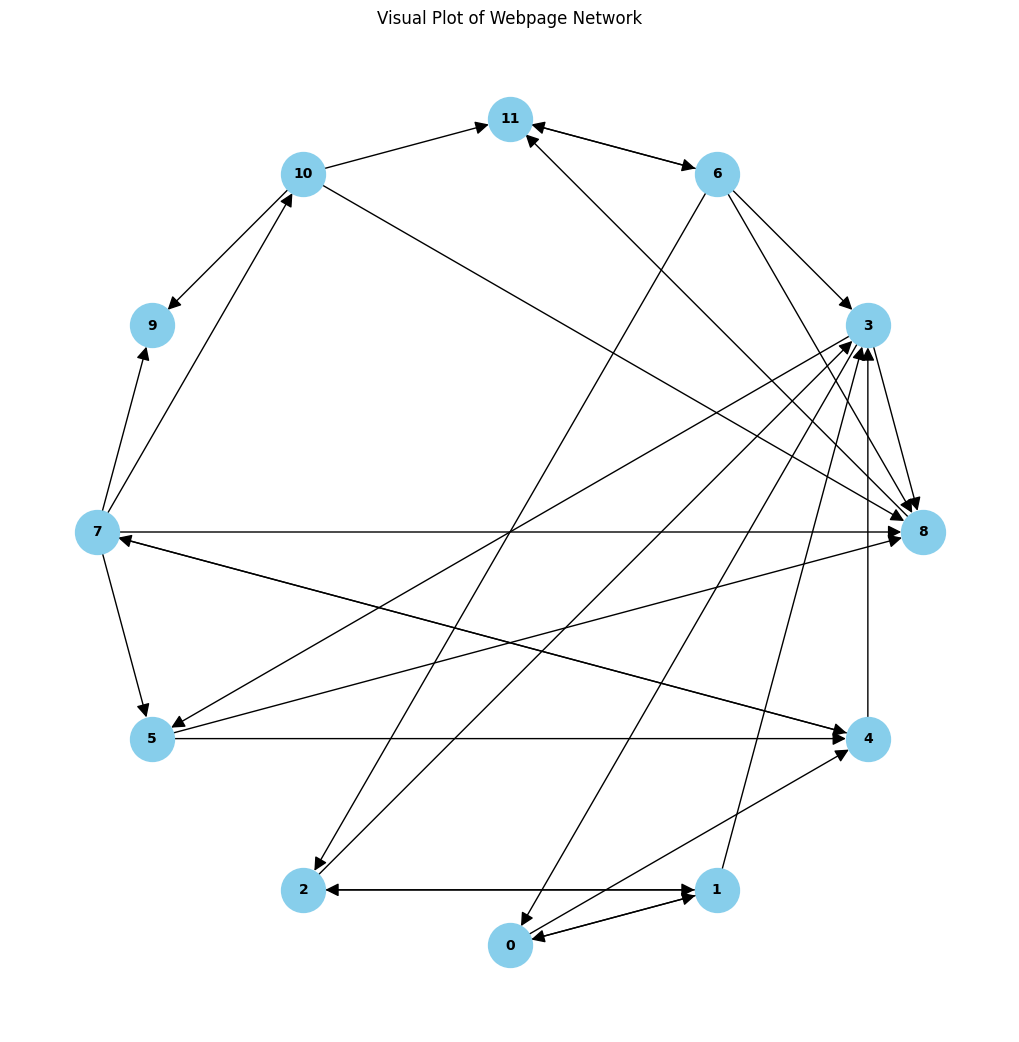

In [93]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
G = np.array([
    [0, 1/2, 0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0],       # A
    [1/3, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],     # B
    [0, 1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0],       # C
    [1/3, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 0, 0],     # D
    [0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0, 0],       # E
    [0, 0, 0, 0, 1/2, 0, 0, 0, 1/2, 0, 0, 0],       # F
    [0, 0, 1/4, 1/4, 0, 0, 0, 0, 1/4, 0, 0, 1/4],   # G
    [0, 0, 0, 0, 1/5, 1/5, 0, 0, 1/5, 1/5, 1/5, 0], # H
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],           # I
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],           # J
    [0, 0, 0, 0, 0, 0, 0, 0, 1/3, 1/3, 0, 1/3],     # K
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]            # L
])

# Create a directed graph from the adjacency matrix
num_nodes = G.shape[0]
G_directed = nx.DiGraph(G)

# Final ranking of the webpages
ranking = [11, 6, 3, 8, 4, 1, 0, 2, 5, 7, 9, 10]
pos = {}
radius = 7
for i, node in enumerate(ranking):
    angle = 2 * np.pi * i / num_nodes
    x = radius * np.sin(angle)
    y = radius * np.cos(angle)
    pos[node] = (x, y)

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G_directed, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, arrowsize=20)
plt.title('Visual Plot of Webpage Network')
plt.show()